# TLT Augment example usecase

This notebook shows an example usecase of Augmenting an object detection dataset using `tlt-augment` in the Transfer Learning Toolkit.

0. [Set-up env variables](#head-0)
1. [Prepare the dataset](#head-1)
2. [Augment the dataset](#head-2)
3. [Visualize augmented results](#head-3)

## 0. Set up env variables <a class="anchor" id="head-0"></a>
This project sets up all the environment variables for the input dataset and the augmented output data.

*Note: Please make sure to remove any stray artifacts/files from the `$USER_EXPERIMENT_DIR` or `$DATA_DOWNLOAD_DIR` paths as mentioned below, that may have been generated from previous runs.

In [25]:
%env USER_EXPERIMENT_DIR=/workspace/tlt-experiments/insect-thesis/data/kitti
%env DATA_DOWNLOAD_DIR=/workspace/tlt-experiments/insect-thesis/data/kitti
%env SPECS_DIR=./specs

env: USER_EXPERIMENT_DIR=/workspace/tlt-experiments/insect-thesis/data/kitti
env: DATA_DOWNLOAD_DIR=/workspace/tlt-experiments/insect-thesis/data/kitti
env: SPECS_DIR=./specs


## 1. Prepare the dataset <a class="anchor" id="head-1"></a>

We will be using the kitti object detection dataset for this example. To find more details, please visit http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d. Please download both, the left color images of the object dataset from [here](http://www.cvlibs.net/download.php?file=data_object_image_2.zip) and, the training labels for the object dataset from [here](http://www.cvlibs.net/download.php?file=data_object_label_2.zip), and place the zip files in `$DATA_DOWNLOAD_DIR`

The data will then be extracted to have
* training images in `$DATA_DOWNLOAD_DIR/train/images`
* training labels in `$DATA_DOWNLOAD_DIR/train/labels`
* testing images in `$DATA_DOWNLOAD_DIR/inference/images`

*Note: There are no labels for the testing images, therefore we use it just to visualize inferences for the trained model.*

In [2]:
# Check the dataset is present
!mkdir -p $DATA_DOWNLOAD_DIR
#!if [ ! -f $DATA_DOWNLOAD_DIR/data_object_image_2.zip ]; then echo 'Image zip file not found, please download.'; else echo 'Found Image zip file.';fi
#!if [ ! -f $DATA_DOWNLOAD_DIR/data_object_label_2.zip ]; then echo 'Label zip file not found, please download.'; else echo 'Found Labels zip file.';fi

In [3]:
# unpack downloaded datasets to $DATA_DOWNLOAD_DIR.
# The training images will be under $DATA_DOWNLOAD_DIR/training/image_2 and 
# labels will be under $DATA_DOWNLOAD_DIR/training/label_2.
# The testing images will be under $DATA_DOWNLOAD_DIR/testing/image_2.
#!unzip -u $DATA_DOWNLOAD_DIR/data_object_image_2.zip -d $DATA_DOWNLOAD_DIR
#!unzip -u $DATA_DOWNLOAD_DIR/data_object_label_2.zip -d $DATA_DOWNLOAD_DIR

In [11]:
# verify
import os

DATA_DIR = os.path.join(DATA_DOWNLOAD_DIR,'fusion')

num_train_images = len(os.listdir(os.path.join(DATA_DIR, "train/images")))
num_train_labels = len(os.listdir(os.path.join(DATA_DIR, "train/labels")))
num_inference_images = len(os.listdir(os.path.join(DATA_DIR, "inference/images")))
print("Number of images in the trainval set. {}".format(num_train_images))
print("Number of labels in the trainval set. {}".format(num_train_labels))
print("Number of images in the inference set. {}".format(num_inference_images))

NameError: name 'DATA_DOWNLOAD_DIR' is not defined

In [ ]:
# Sample kitti label.
!cat $DATA_DOWNLOAD_DIR/train/images/1-geometridae.txt

## Augment the dataset <a class="anchor" id="head-2"></a>
This cell ingests the downloaded KITTI dataset and augments the dataset. For this use case we add 
1. a spatial rotation of 10 degreess.
2. a color space hue rotation of 5 degrees.

In [31]:
!cat $SPECS_DIR/default_spec.txt

# Spec file for tlt-augment.
spatial_config{
}
dataset_config{
    image_path: "images"
    label_path: "labels"
}
color_config{
}
output_image_width: 400
output_image_height: 400
output_image_channel: 3
image_extension: ".jpg"

In [32]:
!augment -a $SPECS_DIR/default_spec.txt \
         -o $DATA_DOWNLOAD_DIR/noctuidae_augmented \
         -d $DATA_DOWNLOAD_DIR/noctuidae/train

2021-03-26 17:22:50.318518: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
2021-03-26 17:22:52,233 [INFO] iva.augment.spec_handler.spec_loader: Merging specification from ./specs/default_spec.txt
2021-03-26 17:22:52,233 [INFO] iva.augment.build_augmentor: Creating output directories.
2021-03-26 17:22:52,233 [INFO] iva.augment.build_augmentor: Input dataset: /workspace/tlt-experiments/insect-thesis/data/kitti/noctuidae/train
2021-03-26 17:22:52,233 [INFO] iva.augment.build_augmentor: Output dataset: /workspace/tlt-experiments/insect-thesis/data/kitti/noctuidae_augmented 
2021-03-26 17:22:52.248035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-26 17:22:52.277619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1082] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUM

## Visualize augmented results <a class="anchor" id="head-3"></a>
Now that the dataset has been augmented, it is worthwhile to render the augmented images and labels.
The outputs of `tlt-augment` are generated in the following paths:
* images: `$USER_EXPERIMENT_DIR/augmented_dataset/images`
* labels: `$USER_EXPERIMENT_DIR/augmented_dataset/labels`

In [23]:
# Simple grid visualizer
%matplotlib inline
import matplotlib.pyplot as plt
import os
from math import ceil
valid_image_ext = ['.jpg', '.png', '.jpeg', '.ppm']

def visualize_images(image_dir, num_cols=4, num_images=10):
    output_path = os.path.join(os.environ['USER_EXPERIMENT_DIR'], image_dir)
    num_rows = int(ceil(float(num_images) / float(num_cols)))
    f, axarr = plt.subplots(num_rows, num_cols, figsize=[80,30])
    f.tight_layout()
    a = [os.path.join(output_path, image) for image in os.listdir(output_path) 
         if os.path.splitext(image)[1].lower() in valid_image_ext]
    for idx, img_path in enumerate(a[:num_images]):
        col_id = idx % num_cols
        row_id = idx // num_cols
        img = plt.imread(img_path)
        axarr[row_id, col_id].imshow(img)

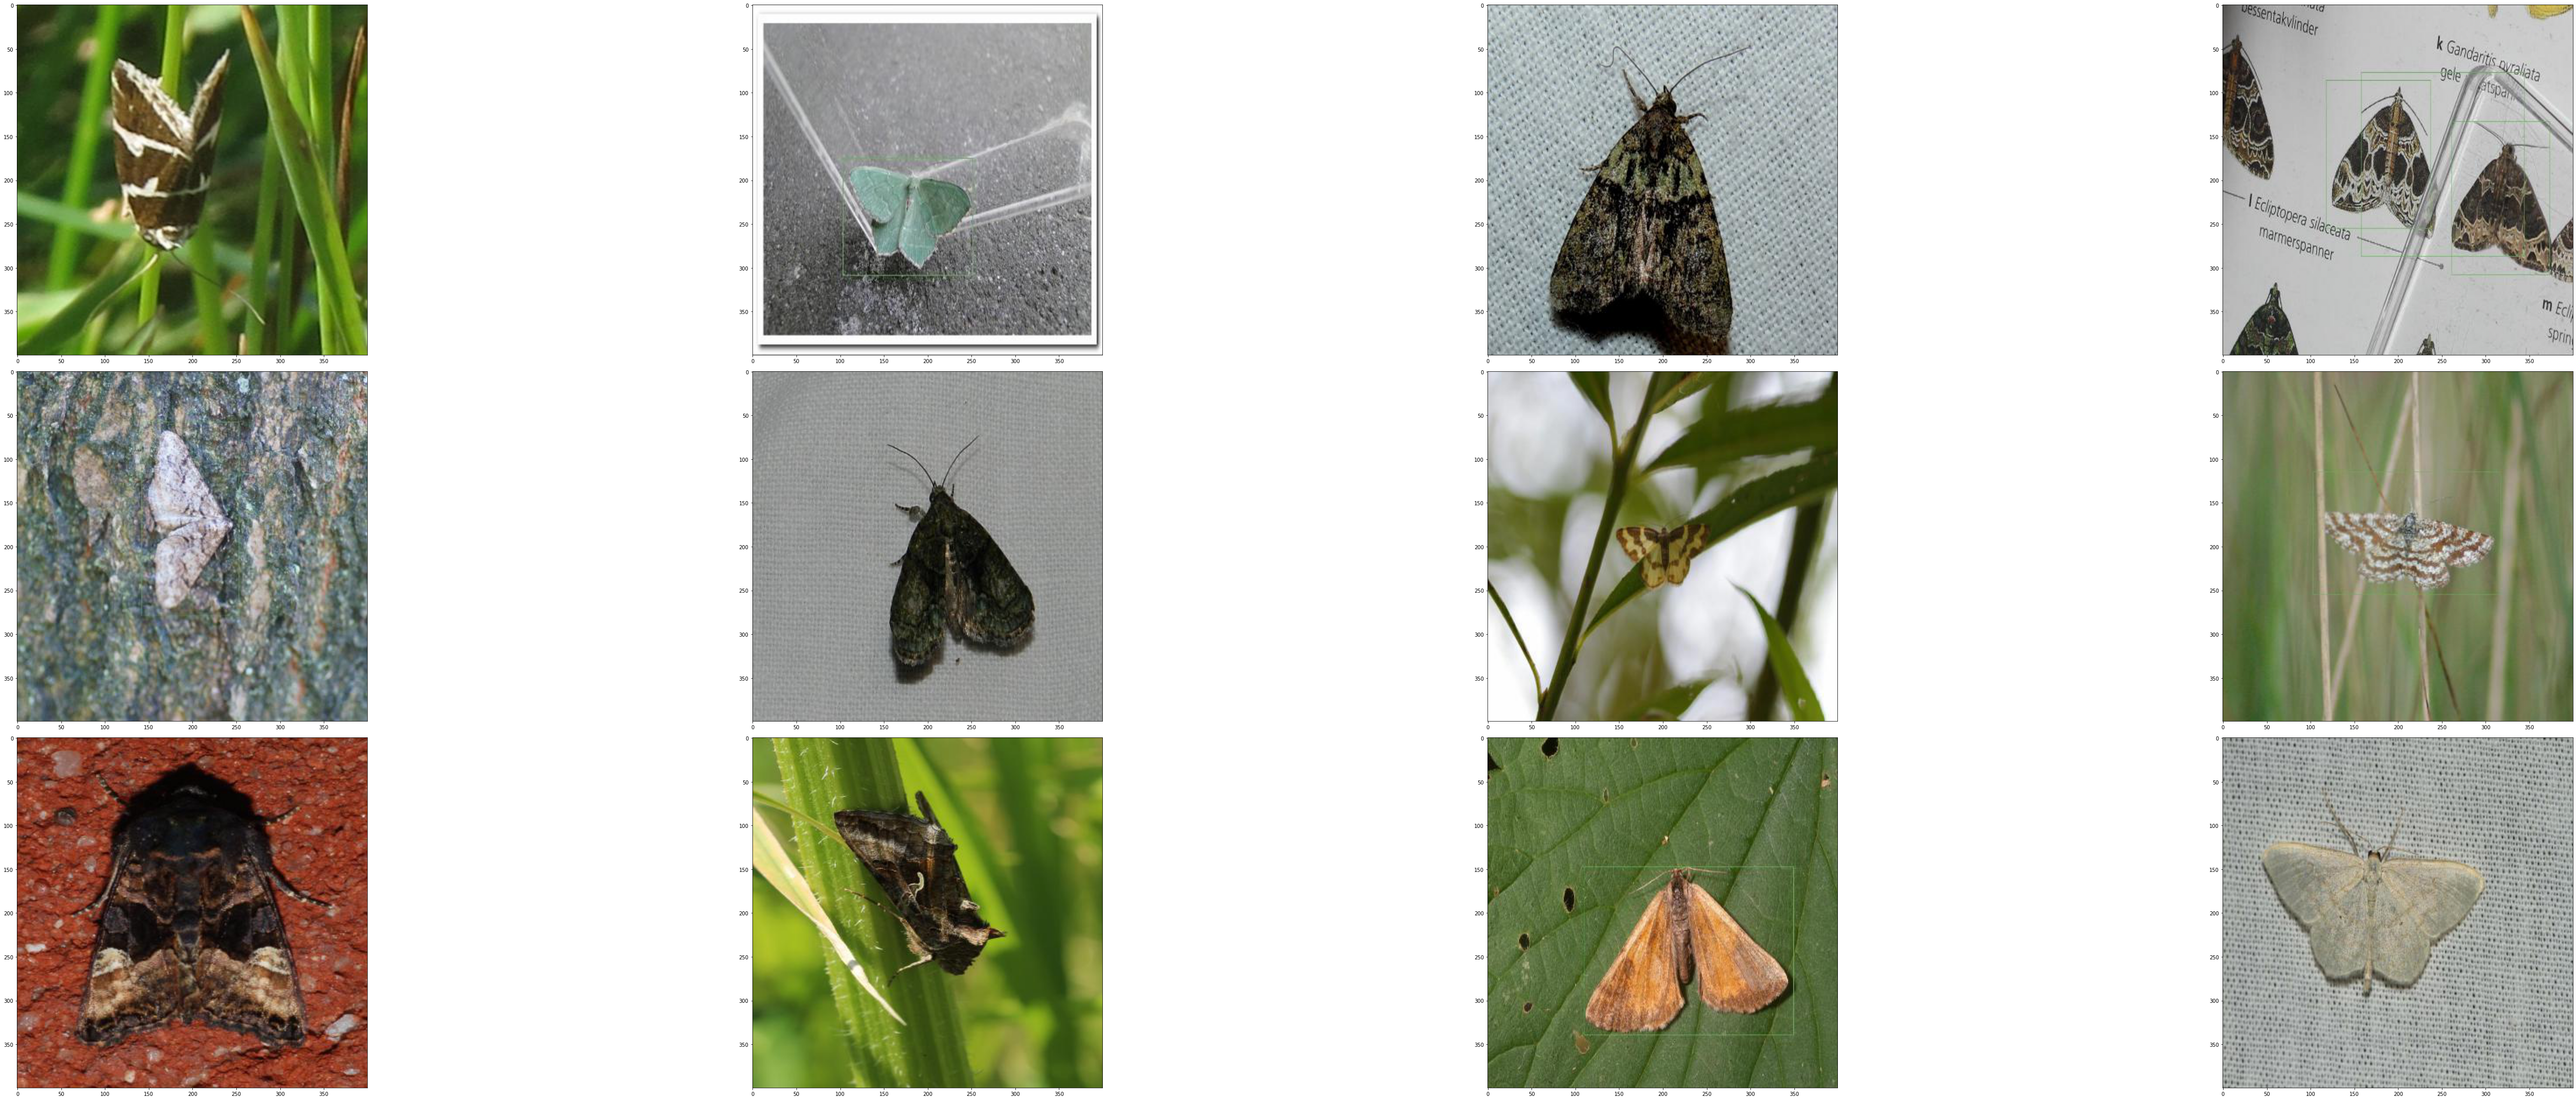

In [30]:
# Visualizing the first 12 images.
OUTPUT_PATH = 'fusion_augmented/images' # relative path from $USER_EXPERIMENT_DIR.
COLS = 4 # number of columns in the visualizer grid.
IMAGES = 12 # number of images to visualize.

visualize_images(OUTPUT_PATH, num_cols=COLS, num_images=IMAGES)